# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [36]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [37]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/daily_aqi_by_county_2023.zip')

Mounted at /content/gdrive


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185017 entries, 0 to 185016
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 185017 non-null  object
 1   county Name                185017 non-null  object
 2   State Code                 185017 non-null  int64 
 3   County Code                185017 non-null  int64 
 4   Date                       185017 non-null  object
 5   AQI                        185017 non-null  int64 
 6   Category                   185017 non-null  object
 7   Defining Parameter         185017 non-null  object
 8   Defining Site              185017 non-null  object
 9   Number of Sites Reporting  185017 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 14.1+ MB


In [39]:
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,185017.000000,185017.000000,185017.000000,185017.000000
mean,29.936773,81.188415,43.498397,1.878595
std,15.904884,93.001539,23.905791,2.273400
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,23.000000,31.000000,1.000000
50%,30.000000,59.000000,41.000000,1.000000
75%,42.000000,107.000000,50.000000,2.000000
max,80.000000,810.000000,1695.000000,33.000000


## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [40]:
#create columns
defining_params = ["State Code", "County Code", "AQI", "Number of Sites Reporting"]
for param in defining_params:
    df[param + '_dummy'] = df[param].apply(lambda x: True if x != 0 else False)

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter

In [42]:
#select final columns for use
df_selected= df[(df['AQI'] < 501)]

df_selected = df.groupby(['State Code', 'County Code', 'Month', 'Season']).agg({'AQI': 'mean', 'Category': 'first'}).reset_index()

target_variable = 'Category'

df_selected.describe()


,State Code,County Code,Month,Season,AQI
count,6542.000000,6542.000000,6542.000000,6542.000000,6542.000000
mean,30.037450,83.222103,4.307704,1.781718,42.276263
std,16.204066,99.358845,2.222166,0.726914,17.214063
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,17.000000,25.000000,2.000000,1.000000,33.741935
50%,30.000000,59.000000,4.000000,2.000000,42.433333
75%,42.000000,109.000000,6.000000,2.000000,49.793548
max,80.000000,810.000000,10.000000,4.000000,543.354839


## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.
- Visualize the regression with at least one of the variables

In [35]:
#create regression
X = df_selected[['State Code', 'County Code', 'Month', 'Season']]
y = df_selected['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


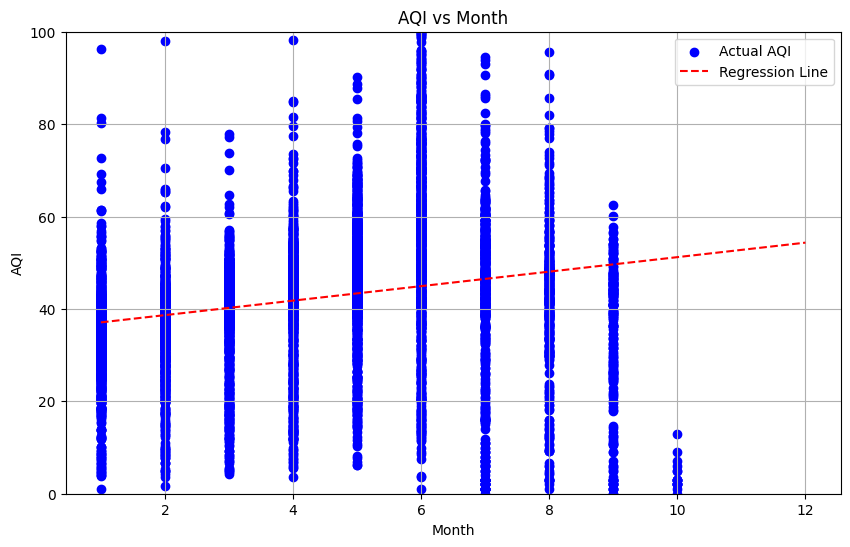

In [44]:
#visual
plt.figure(figsize=(10, 6))

plt.scatter(df_selected['Month'], df_selected['AQI'], color='blue', label='Actual AQI')

model = LinearRegression()
model.fit(df_selected[['Month']], df_selected['AQI'])

months = np.array(range(1, 13)).reshape(-1, 1)
predicted_aqi = model.predict(months)

plt.plot(months, predicted_aqi, color='red', linestyle='--', label='Regression Line')

plt.title('AQI vs Month')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()

## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [24]:
january_data = df_selected[df_selected['Month'] == 1]

average_aqi_january = january_data['AQI'].mean()

print("Average AQI in January across all states and county codes:", average_aqi_january)

Average AQI in January across all states and county codes: 34.38057293242412


## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?

In [ ]:
#import, append and create new model